In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


In [6]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [59]:
data_df = df.copy()

### Encoding the categorical target varible using Label Encoder

In [60]:

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal_encoder = OrdinalEncoder()
le = LabelEncoder()
data_df['stabf'] = le.fit_transform(df['stabf'])

### Dropping the unnecessary columns and assigning the the dependent and independent variables

In [61]:
data_df = data_df.drop(columns=[ 'stab'])
X = data_df.drop(columns= 'stabf' )
y = data_df[ 'stabf' ]

### splitting the dataset into training and testing data in the ratio 80:20 

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

### Scaling x_train,x_test

In [65]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss = StandardScaler() # Standardization

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
#y_train = np.array(y_train)
#y_train = y_train.reshape(-1,1)
#y_test = np.array(y_test)
#y_test = y_test.reshape(-1,1)
#y_test = ss.fit_transform(y_test)


### Importing machine learning libraries for modelling and validation

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix


## RANDOM FOREST CLASSIFIER ACCURACY

In [69]:
classifier_rf = RandomForestClassifier(random_state = 1)
classifier_rf.fit(x_train,y_train)
prediction = classifier_rf.predict(x_test)

print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
#print("Accuracy : ",accuracy_score(y_test,prediction))


Accuracy :  92.80%


## EXTRA TREES CLASSIFIER ACCURACY

In [77]:
ModelET = ExtraTreesClassifier(random_state = 1)
ModelET.fit(x_train,y_train)
prediction = ModelET.predict(x_test)

print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))

Accuracy :  92.60%


## LGBM CLASSIFIER ACCURACY

In [71]:
ModelLGB = lgb.LGBMClassifier(random_state = 1)
ModelLGB.fit(x_train,y_train)
prediction = ModelLGB.predict(x_test)

print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))

Accuracy :  93.65%


## XGB CLASSIFIER ACCURACY

In [72]:
ModelXGB = xgb.XGBClassifier(random_state = 1)
ModelXGB.fit(x_train,y_train)
prediction = ModelXGB.predict(x_test)
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))

Accuracy :  94.60%


### Randomised Search CV

In [78]:
from sklearn.model_selection import RandomizedSearchCV


In [89]:
 param = {'n_estimators':[ 100,300,100,500],'min_samples_split':[2,5,7,2],'min_samples_leaf':[8,6,4,8],'max_features':[None,'auto',None,'log2'] }

In [91]:
rnd_search = RandomizedSearchCV(ExtraTreesClassifier(),param,cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,random_state = 1 )
rnd_search.fit(X,y)
from pprint import pprint

pprint(rnd_search.best_params_)
pprint(rnd_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}
0.9304


### The parameter above is the best parameter

In [94]:
ModelET = ExtraTreesClassifier(random_state = 1,n_estimators = 100 , min_samples_split = 7 , min_samples_leaf = 4, max_features = None)
ModelET.fit(x_train,y_train)
prediction = ModelET.predict(x_test)

print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))


Accuracy :  93.10%


##### The previous accuracy is 92.60% and the new accurace is 93.1%

## The accuracy is Higher

In [ ]:
fauture_imp = ExtraTreesClassifier(random_state = 1,n_estimators = 100 , min_samples_split = 7 , min_samples_leaf = 4, max_features = None)
fauture_imp  

## Feature importance 

In [97]:
ModelET = ExtraTreesClassifier(random_state = 1,n_estimators = 100 , min_samples_split = 7 , min_samples_leaf = 4, max_features = None)

ModelET.fit(X,y)
#prediction = ModelET.predict(x_test)
feauture_importance = ModelET.feature_importances_
feauture_importance

array([0.13365908, 0.13285746, 0.1297238 , 0.13216452, 0.00766336,
       0.01082035, 0.01024937, 0.01014571, 0.10560117, 0.10826962,
       0.11149598, 0.10734957])

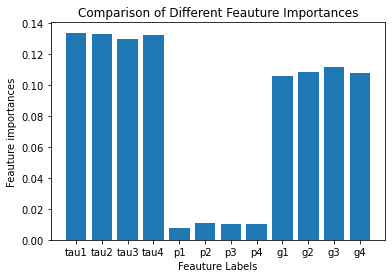

In [99]:
plt.bar(X.columns,feauture_importance)
plt.xlabel('Feauture Labels')
plt.ylabel('Feauture importances')
plt.title('Comparison of Different Feauture Importances')
plt.show()

### Most and least important feautures are tau2 and p1 respectively